In [1]:
import numpy as np


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
titanic=pd.read_csv("E:/datasets/train.csv")

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.shape

(891, 12)

In [9]:
titanic_data=titanic.drop(['Name','Ticket','Cabin','Embarked','SibSp','Parch','Fare'],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


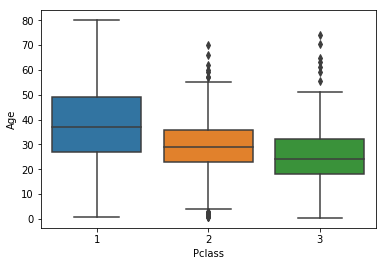

In [10]:
sb.boxplot(x='Pclass',y='Age',data=titanic_data)

In [11]:
def age_approx(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
titanic_data['Age']=titanic_data[['Age','Pclass']].apply(age_approx,axis=1)
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [14]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
titanic_data['Sex']=le.fit_transform(titanic_data['Sex'])

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,1,22.0
1,2,1,1,0,38.0
2,3,1,3,0,26.0
3,4,1,1,0,35.0
4,5,0,3,1,35.0


In [30]:
X=titanic_data.iloc[:,[0,2,3,4]].values #converting pandas into numpy
y=titanic_data.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=11)

In [31]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
accuracy_score(y_test,y_pred)

0.8379888268156425

In [28]:
ts_score=[]
import numpy as np
for j in range(100):
    X_train, X_test, y_train,y_test= train_test_split(X,y,random_state=j, test_size=0.1)
    lr =LogisticRegression().fit(X_train,y_train)
    ts_score.append(lr.score(X_test,y_test))
K= ts_score.index(np.max(ts_score))


E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\py

E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python install\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\py

In [29]:
K

11

In [34]:
c=confusion_matrix(y_test,y_pred)

In [35]:
c

array([[104,  14],
       [ 15,  46]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       118
           1       0.77      0.75      0.76        61

   micro avg       0.84      0.84      0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [37]:
cm=pd.DataFrame(c)

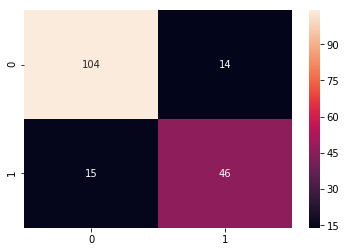

In [38]:
sb.heatmap(cm,annot=True,fmt="d")